In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [122]:
from antifold.antiscripts import IMGT_dict
import logomaker
import warnings

In [129]:
amino_list = list("ACDEFGHIKLMNPQRSTVWY")

# Load CSV
df_csv = pd.read_csv("../output/single_pdb/6y1l_imgt.csv")

# Set index to pdb_pos
df_csv.index = df_csv["pdb_posins"]

# Extract relevant positions
region_str_list = ["CDR1", "CDR2", "CDR3"]
region_list = [list(IMGT_dict[key]) for key in region_str_list]

# Split into H/L chains
H, L = df_csv["pdb_chain"].unique()[0:2]
for chain in [H, L]:

    # Relevant regions
    for region, region_str in zip(region_list, region_str_list):

        # H or L chain only
        df_chain = df_csv[df_csv["pdb_chain"] == chain]

        # Probabilities for this region only
        selected_region = df_chain[df_chain["pdb_pos"].isin(region)]
        probs = selected_region[amino_list]

        # Log-probs to probs
        probs = np.e**(probs)

        # Sum to 1
        probs[:] = probs.values / probs.sum(axis=1).values.reshape(-1, 1)

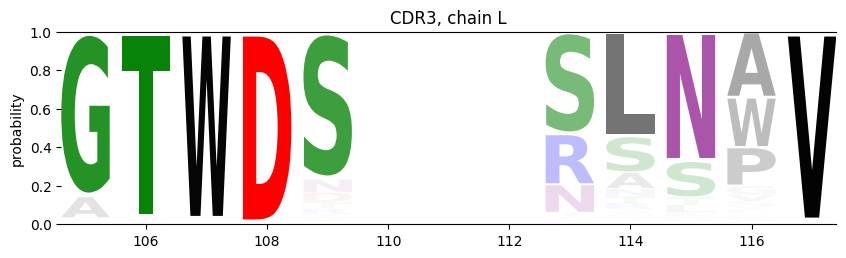

In [130]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # load ss probability matrix
    #ss_df = logomaker.get_example_matrix('ss_probability_matrix',
    #                                    print_description=False)
    #ss_df = pd.DataFrame(ss_df.values, index=region, columns=ss_df.columns)
    ss_df = probs

    # create Logo object
    #plt.figure(figsize=(5, 10))
    ss_logo = logomaker.Logo(ss_df,
                            width=.8,
                            vpad=.05,
                            fade_probabilities=True,
                            stack_order='big_on_top',
                            color_scheme='chemistry')

    # style using Logo methods
    ss_logo.style_spines(spines=['left', 'right'], visible=False)
    ss_logo.ax.set_ylabel('probability')
    plt.title(f"{region_str}, chain {chain}")